# Business Understanding

## Project Domain

In [84]:
# tentukan domain project yang akan dikerjakan misal bidang pertanian, lingkungan hidup, pendidikan, soaial, dll
# Linkungan Hidup

In [85]:
# deskripsikan domain project ini dengan jelas dan lengkap
## Proyek ini berfokus pada analisis risiko bencana banjir di Jawa Barat 
# akibat curah hujan ekstrem. Dengan memanfaatkan 
# data historis iklim dari stasiun pengamatan resmi (BMKG),
#  proyek ini bertujuan membangun model Machine Learning sebagai sistem peringatan dini (Early Warning System) yang dapat memprediksi status kerawanan wilayah (Aman/Waspada) secara akurat dan preventif.

## Problem Statements

In [86]:
# tetukan poin-poin permasalahan yang ada dalam domain project
# Jawa Barat memiliki tingkat kerawanan bencana hidrometeorologi (banjir) yang tinggi. Masalah utama yang dihadapi adalah:
#* Sulitnya menentukan ambang batas curah hujan yang berpotensi memicu banjir di wilayah spesifik tanpa analisis data historis.
#* Mitigasi bencana seringkali bersifat reaktif karena kurangnya sistem peringatan dini yang berbasis data (*data-driven*).
#* Keterbatasan sebaran data valid dari stasiun BMKG, sehingga analisis perlu difokuskan pada wilayah studi kasus tertentu.

## Goals

In [87]:
# sebutkan tujuan membangun aplikasi ML ini sesuai permasalahan yang ada
#* Membangun model klasifikasi menggunakan algoritma **Decision Tree** untuk memprediksi status kerawanan banjir (Aman/Waspada).
#* Menganalisis pola hubungan antara intensitas curah hujan bulanan (Data BPS) dengan kejadian banjir (Data BPBD).
#* Membuat *prototype* aplikasi berbasis **Streamlit** sebagai alat simulasi prediksi risiko banjir sederhana.

## Solution Statements

In [88]:
# sebutkan solusi aplikasi ai yang akan dibangun
# 

# Data Understanding

## Dataset Description

In [89]:
# Deskripsikan dataset yang digunakan

In [90]:
# berikan link sumber dataset (harus berasal dari public dataset)

In [91]:
# jelaskan cara membuat datasetnya

## Libary Requirements

In [92]:
# Tentukan library yang dibutuhkan
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [93]:
df = pd.read_csv('stunting_fix.csv')
df.head(10)

,nama_kabupaten_kota,jumlah_imunisasi,jumlah_bblr,jumlah_balita_stunting,jumlah_sanitasi
0,KABUPATEN BOGOR,113376,1633,18752,1585980
1,KABUPATEN SUKABUMI,42663,2033,15583,827181
2,KABUPATEN CIANJUR,37461,1143,12761,454588
3,KABUPATEN BANDUNG,68953,1976,19121,1124046
4,KABUPATEN GARUT,29577,1107,9723,493892
5,KABUPATEN TASIKMALAYA,30810,1161,17254,441781
6,KABUPATEN CIAMIS,18379,797,4254,376588
7,KABUPATEN KUNINGAN,19381,1146,5553,288015
8,KABUPATEN CIREBON,48457,1608,14127,505980
9,KABUPATEN MAJALENGKA,20287,833,4642,302197


In [94]:
df.mean(numeric_only=True)

jumlah_imunisasi           29576.785185
jumlah_bblr                  848.200000
jumlah_balita_stunting      6649.370370
jumlah_sanitasi           493891.807407
dtype: float64

## Exploratory Data Abalysis

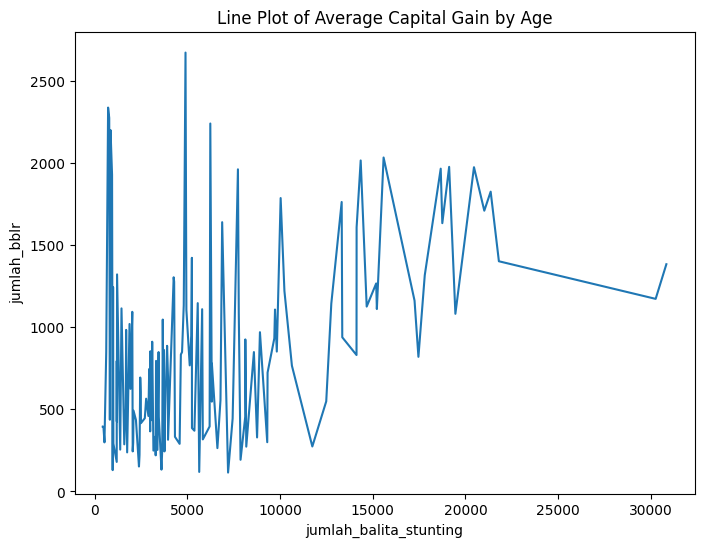

In [95]:
# Buatkan EDA dan berikan deskripsinya :
# 2 line plot
avg_capital_gain_by_age = df.groupby('jumlah_balita_stunting')['jumlah_bblr'].mean()
plt.figure(figsize=(8, 6))
plt.plot(avg_capital_gain_by_age.index, avg_capital_gain_by_age.values)
plt.title('Line Plot of Average Capital Gain by Age')
plt.xlabel('jumlah_balita_stunting')
plt.ylabel('jumlah_bblr')
plt.show()

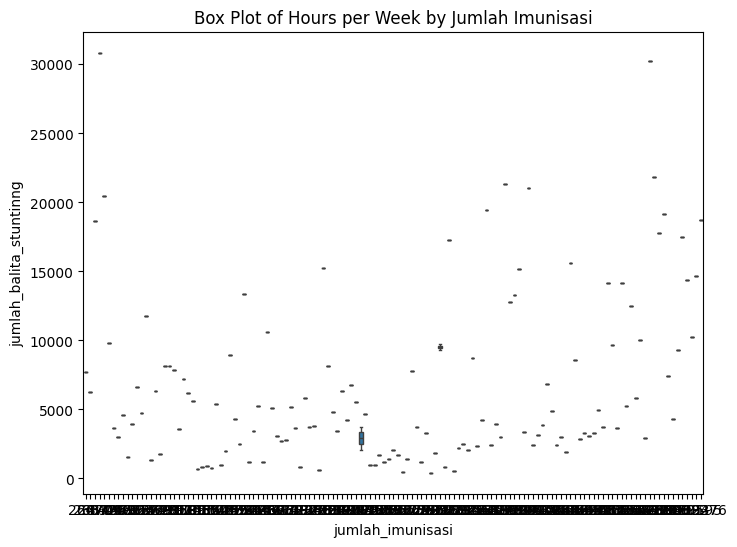

In [96]:
# 2 box plot
plt.figure(figsize=(8, 6))
sns.boxplot(x='jumlah_imunisasi', y='jumlah_balita_stunting', data=df)
plt.title('Box Plot of Hours per Week by Jumlah Imunisasi')
plt.xlabel('jumlah_imunisasi')
plt.ylabel('jumlah_balita_stuntinng')
plt.show()

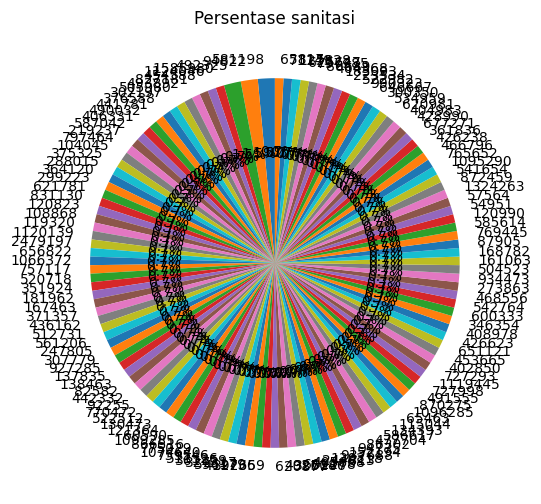

In [97]:
# 2 pie chart
sanitasi_counts = df['jumlah_sanitasi'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(sanitasi_counts.values, labels=sanitasi_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Persentase sanitasi')
plt.show()


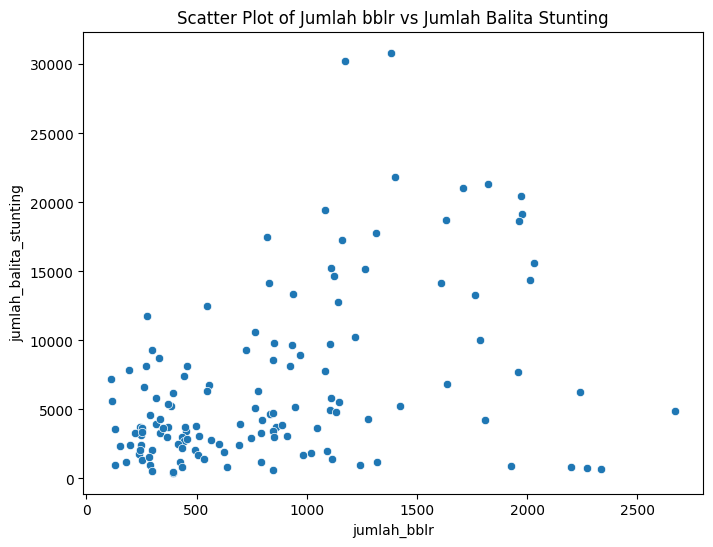

In [98]:
# scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='jumlah_bblr', y='jumlah_balita_stunting', data=df)
plt.title('Scatter Plot of Jumlah bblr vs Jumlah Balita Stunting')
plt.xlabel('jumlah_bblr')
plt.ylabel('jumlah_balita_stunting')
plt.show()

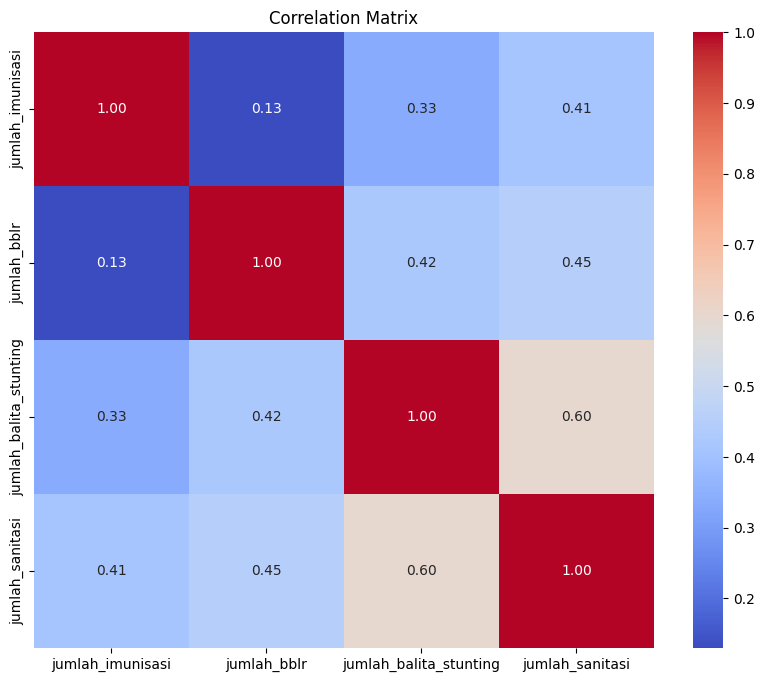

In [99]:
# corelation matrix
stunting_cols = df.select_dtypes(include=['number']).columns
correlation_matrix = df[stunting_cols].corr() 
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()


# Data Preparation

## Dataset Information

In [100]:
# berikan informasi dataset seperti jumlah kolom, jumlah baris, tipe data, dll

## Dataset Transformation

In [101]:
# jelaskan bagaimana dataset ditransformasikan sebelum diolah menggunakan model ML

In [102]:
# bisa menggunakan auto encoder atau manual menggunakan bins

## Determine Variabels

In [103]:
# tentukan variabel apa saja yang digunakan sebagai fitur/label
x = df[['jumlah_imunisasi','jumlah_bblr','jumlah_sanitasi']]
y = df['jumlah_balita_stunting']

In [104]:
x_test, x_train, y_test, y_train = train_test_split(x,y,random_state=3, test_size=0.2)

# Modeling

## Modeling classification / clustering

In [105]:
# buatkan modeling menggunakan algoritma ML
model = RandomForestRegressor(
    n_estimators=200, 
    min_samples_split=10, 
    min_samples_leaf=2, 
    random_state=42
)
model.fit(x,y)

,n_estimators,200
,criterion,'squared_error'
,max_depth,None
,min_samples_split,10
,min_samples_leaf,2
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [106]:
# intercept = model.intercept_
# intercept

In [107]:
# koefisien = model.coef_
# koefisien

In [108]:
newData = np.array([[50000,500,800000]])

In [109]:
predic = model.predict(newData)
predic

c:\Users\saban\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([6358.03716055])

In [110]:
y_pred = model.predict(x_test)

# Evaluation

## Model evaluation classification / clustering

In [111]:
# tentukan metode evaluasi yang digunakan dan berikan penjelasan terhadap hasil evaluasinya

In [112]:
# untuk supervised bisa menggunakan mse, rmse, atau confusion matrix

In [113]:
mse = mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)

In [114]:
print(f"mean squared error : {mse}")
print(f"R2 Score : {r2}")

mean squared error : 9373293.06679637
R2 Score : 0.7496565431607253


In [115]:
# untuk unsupervised bisa gunakan sillouete atau davies bouldin

# Deployment

## Model Simulation

In [116]:
# simulasika model dengan inputan data baru
dataBaru = np.array([[200,3000,4000]])
prediksi = model.predict(dataBaru)

print("Hasil prediksi:", prediksi)

Hasil prediksi: [2874.656914]


c:\Users\saban\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## Save Model

In [117]:
# simpan model sebelum dilanjutka n ke aplikasi streamlit
import pickle
filename = 'model_stunting.pkl'
pickle.dump(model,open(filename, 'wb'))

In [118]:


# 1. Siapkan Model Random Forest (Masih Kosong)
rf = RandomForestRegressor(random_state=42)

# 2. Tentukan Kisi-kisi Settingan yang Mau Dicoba
# (Komputer akan mencoba semua kombinasi angka ini satu-satu)
param_grid = {
    'n_estimators': [50, 100, 200],      # Mau pakai berapa pohon? 50, 100, atau 200?
    'max_depth': [None, 10, 20],         # Pohonnya boleh sedalam apa?
    'min_samples_split': [2, 5, 10],     # Minimal data buat mecah cabang
    'min_samples_leaf': [1, 2, 4]        # Minimal data di ujung ranting
}

# 3. Jalankan Pencarian Otomatis (Tuning)
print("Sedang mencari settingan terbaik... (Mungkin butuh 1-2 menit)")
grid_search = GridSearchCV(
    estimator=rf, 
    param_grid=param_grid, 
    cv=3,           # Cross Validation 3x biar valid
    n_jobs=-1,      # Pakai semua core CPU biar ngebut
    scoring='r2'    # Cari yang skor R2-nya paling tinggi
)

grid_search.fit(x_train, y_train)

# 4. Tampilkan Hasil Juara
print("\n=== HASIL TUNING ===")
print("Settingan Terbaik:", grid_search.best_params_)

# 5. Pakai Model Terbaik ini buat Prediksi
best_model = grid_search.best_estimator_
print("Akurasi (R2) Setelah Tuning:", best_model.score(x_test, y_test))

# 6. Simpan Model Terbaik ini
import pickle
with open('model_stunting_tuned.pkl', 'wb') as file:
    pickle.dump(best_model, file)
print("Model yang sudah di-tuning berhasil disimpan sebagai 'model_stunting_tuned.pkl'")

Sedang mencari settingan terbaik... (Mungkin butuh 1-2 menit)

=== HASIL TUNING ===
Settingan Terbaik: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Akurasi (R2) Setelah Tuning: 0.2985607630218672
Model yang sudah di-tuning berhasil disimpan sebagai 'model_stunting_tuned.pkl'
